## Nivell 3

Manipulació d’imatges amb Matplotlib.

Carregareu qualsevol imatge (jpg, png ..) amb Matplotlib. adoneu-vos que les imatges RGB (Red, Green, Blue) són realment només amplades × alçades × 3 matrius (tres canals Vermell, Verd i Blau), una per cada color de nombres enters int8,

manipuleu aquests bytes i torneu a utilitzar Matplotlib per desar la imatge modificada un cop hàgiu acabat.

Ajuda:Importeu, import matplotlib.image as mpimg. estudieu el metodde mpimg.imread(()

### Exercici 8

Mostreu-me a veure que passa quan eliminem el canal G Verd o B Blau.

Mostreu-me a veure què passa quan eliminem el canal G Verd o B Blau. Hauries d'utilitzar la indexació per seleccionar el canal que voleu anul·lar.

Utilitzar el mètode, mpimg.imsave () de la llibreria importada, per guardar les imatges modificades i que haureu de pujar al vostre repositori a github.

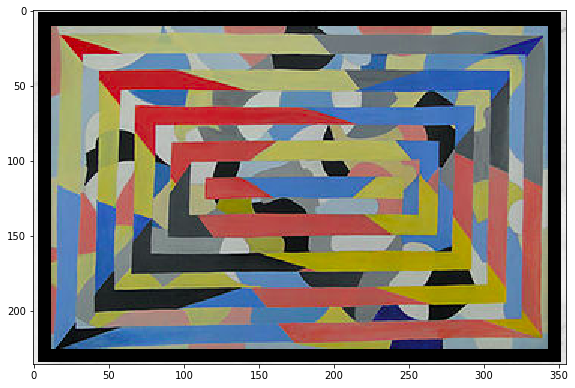

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams["figure.figsize"] = [9.50, 5.50]
plt.rcParams["figure.autolayout"] = True

img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/2/2b/Beauty_-_painting_by_jas_mand.png')
plt.imshow(img)



Veo que si no pones el %matplotlib inline la librería no carga bien. Con esto hay que verlo que se trata como una matriz de las que hemos visto antes. 

In [5]:


print("ndim: ",img.ndim)
print("shape: ",img.shape)
print("size: ",img.size)
print("dtype: ",img.dtype)



ndim:  3
shape:  (236, 355, 4)
size:  335120
dtype:  float32


Ahora vamos a intentar quitarle el verde a la imagen. Para ello vamos a quitarle la segunda capa (en este caso veo que hay 4 canales porque quizá la imagen tenga un canal de alpha, transparencia)

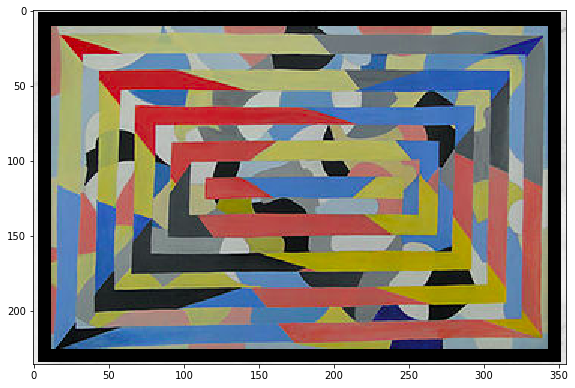

In [6]:
img2 = np.copy(img)
plt.imshow(img2)

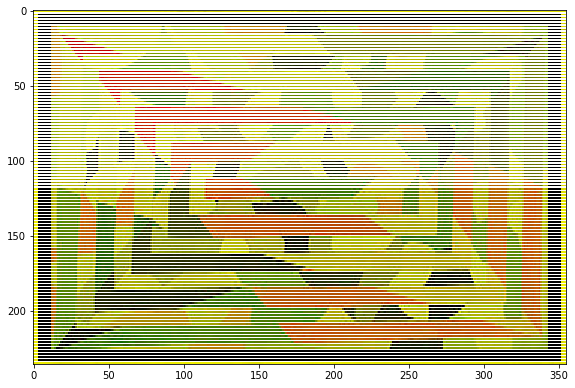

In [41]:
img2[::2] = 0
plt.imshow(img2)

img2[:,:,2] = 0
plt.imshow(img2)

Esto es muy gracioso pero esto no es, así que reiniciamos la imagen y hacmos otro intento. 

In [11]:
img2 = np.copy(img)
print(img2[0:3,0:1,:])

[[[0.9098039 0.9098039 0.9098039 1.       ]]

 [[0.9098039 0.9098039 0.9098039 1.       ]]

 [[0.9137255 0.9137255 0.9137255 1.       ]]]


A ver si este PNG no está en RGB de 0 a 255!

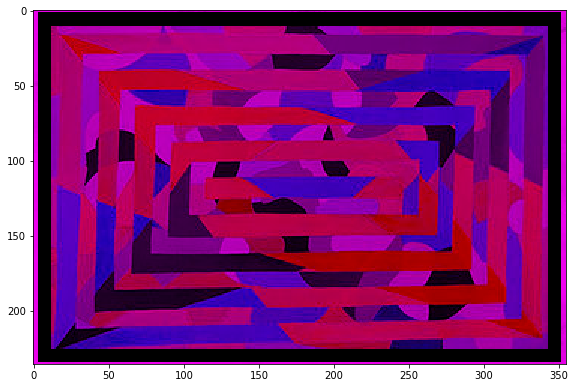

In [17]:
# Dimensions of img2
[rows,cols,pages]=np.shape(img2)
# Split image "pages" into seperate r g b a channels
r=img2[:,:,0]
g=img2[:,:,1]
b=img2[:,:,2]
alpha=img2[:,:,3]
# Create an empty array where rgb=0
im1empty=np.zeros([rows,cols,pages])
# Create an array with r=r, g=g, b=0
rb=np.copy(im1empty)
rb[:,:,0]=rb[:,:,0]+r
rb[:,:,2]=rb[:,:,2]+b
rb[:,:,3]=rb[:,:,3]+alpha
# Create a Figure and plot rg
plt.figure(3)
plt.axis('on')
plt.imshow(rb)

Con esto hemos podido sacar el verde. Ahora probemos a sacar el azul:

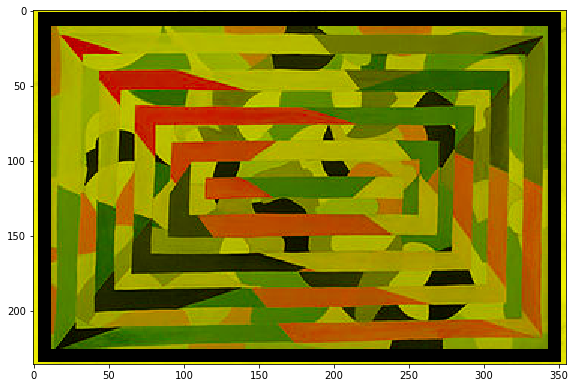

In [24]:

# Create an array with r=r, g=g, b=0
rg=np.copy(im1empty)
rg[:,:,0]=rg[:,:,0]+r
rg[:,:,1]=rg[:,:,1]+g
rg[:,:,3]=rg[:,:,3]+alpha
# Create a Figure and plot rg
plt.figure(3)
plt.axis('on')
plt.imshow(rg)



Utilitzar el mètode, mpimg.imsave() de la llibreria importada, per guardar les imatges modificades i que haureu de pujar al vostre repositori a github.



In [25]:
import os
#Create a directory
path = os.path.join(".","img")
if not os.path.exists(path):
    os.mkdir(path)

#Save the arrays as image files
mpimg.imsave(os.path.join(path,"img.png"), img)
mpimg.imsave(os.path.join(path,"img2.png"), img2)
mpimg.imsave(os.path.join(path,"rg.png"), rg)
mpimg.imsave(os.path.join(path,"rb.png"), rb)




Y ahora voy a probar a hacer alguna MOVIDA como poner valores ligeramente al azar y distorsionar la imagen porque HEMOS VENIDO A JUGAR

In [34]:
img3 = np.copy(img)
suma = 0
for x in range(img3[:,:,0].size):
    suma += 1
print(suma)

83780


Primero un pequeño iterador que vaya por todos los píxeles. 


In [37]:
236 * 355 # tamaño en píxeles según np.shape de la imagen

83780

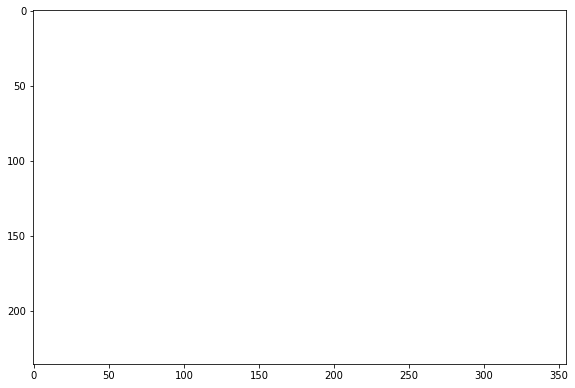

In [59]:
# Dimensions of img2
rng = np.random.RandomState(13)
[rows,cols,pages]=np.shape(img2)
imagenResta = np.array(rng.rand(rows,cols,pages))*0.4
imagenResta[:,:,3] = 0
plt.imshow(imagenResta)


[[[0.9098039 0.9098039 0.9098039 1.       ]]

 [[0.9098039 0.9098039 0.9098039 1.       ]]

 [[0.9137255 0.9137255 0.9137255 1.       ]]]
[[[0.59872296 0.81478744 0.58009251 1.        ]]

 [[0.87906669 0.90158679 0.88232294 1.        ]]

 [[0.60999449 0.5566305  0.71492204 1.        ]]]


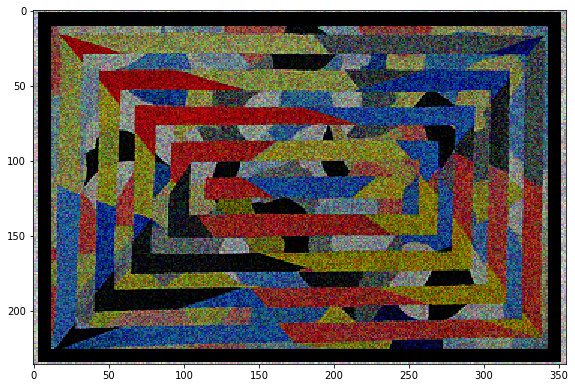

In [60]:
img3 = np.copy(img)
print(img3[0:3,0:1,:])
img3 = img3 - imagenResta
print(img3[0:3,0:1,:])
img3 = np.clip(img3, 0, 1)
plt.imshow(img3)

(❁´◡`❁)

Por fin. 

He visto que hay una herramienta to guapa y to flama llamada np.clip para evitar que los valores de un array se te vayan de madre sin tener que iterar nada (ya lo hace numpy)

https://www.delftstack.com/es/howto/numpy/python-numpy-replace-values/#numpy-reemplazar-valores-con-la-funci%C3%B3n-numpy-clip

Los pasos son: voy a hacer una imagen de ruido. Le reduzco el ruido y le pongo opacidad en 0 (el último canal) 

Me hago una copia de la imagen. 

Imprimo los primeros valores sólo para ver que todo va bien. 

Resto la imagen ruido así en plan TAL CUAL a la imagen original. Le hago un clip para que si baja de cero se quede en cero y no webee. 

Profit. 

In [61]:
mpimg.imsave(os.path.join(path,"img3.png"), img3)
mpimg.imsave(os.path.join(path,"imagenResta.png"), imagenResta)